# Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.


In [4]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 70.5 MB/s eta 0:00:00


In [5]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
from geopandas import GeoDataFrame

In [6]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [ ]:
pwd

'/Users/alejandroboyco/Documents/Python'

In [13]:
#Import the data
link = "https://raw.githubusercontent.com/alexanderquispe/Diplomado_PUCP/main/_data/data_dengue_peru.csv"
data = pd.read_csv(link)
data.head(3)

<ipython-input-13-990ad5d5f624>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(link)


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN


In [14]:
#Replace Null values with 0 in order to change the type value from 'Casos'
data['Casos'] = data['Casos'].fillna(0)
data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,0
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,0
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,0


In [15]:
#Check type value
data.dtypes

Año                 int64
Semana              int64
Eventos o daños    object
Departamento       object
Distrito           object
Provincia          object
Ubigeo              int64
Casos              object
dtype: object

In [16]:
#Change the type value from 'Casos'
data['Casos'] = data['Casos'].str.replace(',','').astype(float)

In [17]:
data.dtypes

Año                  int64
Semana               int64
Eventos o daños     object
Departamento        object
Distrito            object
Provincia           object
Ubigeo               int64
Casos              float64
dtype: object

In [ ]:
#Eliminate the unnecesary columns
data2= data[["Año", "Departamento", "Distrito", "Provincia", "Ubigeo", "Casos"]]
data2

,Año,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,CUSCO,MEGANTONI,LA CONVENCION,80914,NaN
1,2021,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,CUSCO,MEGANTONI,LA CONVENCION,80914,NaN
4,2020,CUSCO,MEGANTONI,LA CONVENCION,80914,NaN
...,...,...,...,...,...,...
172139,2021,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


In [ ]:
data2["Distrito"].unique().size

455

In [ ]:
#Group by the previous dataframe
data_2 = data2.groupby( ['Año', 'Departamento', 'Provincia', 'Distrito', 'Ubigeo' ], as_index = False )[['Casos']].sum()
data_2

,Año,Departamento,Provincia,Distrito,Ubigeo,Casos
0,2015,AMAZONAS,BAGUA,ARAMANGO,10202,0.0
1,2015,AMAZONAS,BAGUA,BAGUA,10201,7.0
2,2015,AMAZONAS,BAGUA,COPALLIN,10203,0.0
3,2015,AMAZONAS,BAGUA,EL PARCO,10204,0.0
4,2015,AMAZONAS,BAGUA,IMAZA,10205,1.0
...,...,...,...,...,...,...
3243,2021,UCAYALI,PADRE ABAD,CURIMANA,250303,22.0
3244,2021,UCAYALI,PADRE ABAD,IRAZOLA,250302,19.0
3245,2021,UCAYALI,PADRE ABAD,NESHUYA,250304,11.0
3246,2021,UCAYALI,PADRE ABAD,PADRE ABAD,250301,68.0


In [ ]:
data_2["Distrito"].unique().size

455

In [ ]:
#df = data.groupby(['Año','Ubigeo', 'Departamento', 'Provincia', 'Distrito'])['Casos'].agg('sum')

# Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [ ]:
data.dtypes

Año                  int64
Semana               int64
Eventos o daños     object
Departamento        object
Distrito            object
Provincia           object
Ubigeo               int64
Casos              float64
dtype: object

In [ ]:
#Create a special UBIGEO for Departments
data_2['UBIGEO_DEP'] = data_2['Ubigeo'].astype(str).str[0:2]
#Create a special UBIGEO for Provinces
data_2['UBIGEO_PRO'] = data_2['Ubigeo'].astype(str).str[0:4]
data_2

,Año,Departamento,Provincia,Distrito,Ubigeo,Casos,UBIGEO_DEP,UBIGEO_PRO
0,2015,AMAZONAS,BAGUA,ARAMANGO,10202,0.0,10,1020
1,2015,AMAZONAS,BAGUA,BAGUA,10201,7.0,10,1020
2,2015,AMAZONAS,BAGUA,COPALLIN,10203,0.0,10,1020
3,2015,AMAZONAS,BAGUA,EL PARCO,10204,0.0,10,1020
4,2015,AMAZONAS,BAGUA,IMAZA,10205,1.0,10,1020
...,...,...,...,...,...,...,...,...
3243,2021,UCAYALI,PADRE ABAD,CURIMANA,250303,22.0,25,2503
3244,2021,UCAYALI,PADRE ABAD,IRAZOLA,250302,19.0,25,2503
3245,2021,UCAYALI,PADRE ABAD,NESHUYA,250304,11.0,25,2503
3246,2021,UCAYALI,PADRE ABAD,PADRE ABAD,250301,68.0,25,2503


# Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.


In [ ]:
#Import Shapefile
maps = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
maps["geometry"][0]

KeyboardInterrupt: 

In [ ]:
maps[0:5]

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."


In [ ]:
#Check unique values (from identifiers for the districts)

maps['UBIGEO'].is_unique #It's true

maps['UBIGEO'].unique().size

1874

In [ ]:
#We filter the Shape file by UBIGEO and geometry
maps = maps[['UBIGEO', 'geometry']]
maps = maps.rename({'UBIGEO':'Ubigeo'}, axis =1 )
maps 

,Ubigeo,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [ ]:
#We analyze if UBIGEO is a int value or not
maps.dtypes 

Ubigeo        object
geometry    geometry
dtype: object

In [ ]:
# First change from Object to string, after that, to int

maps['Ubigeo'] = maps['Ubigeo'].astype(str).astype(int)
maps

,Ubigeo,geometry
0,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,40404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,40405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,40406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,40407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [ ]:
# Analyze which longitud-latitud projection is
maps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Merge using inner way to drop missing values 

dataset = maps.merge(data_2, on="Ubigeo", how="outer", indicator= True)
dataset

,Ubigeo,geometry,Año,Departamento,Provincia,Distrito,Casos,UBIGEO_DEP,UBIGEO_PRO,_merge
0,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...
4642,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2017.0,JUNIN,SATIPO,MAZAMARI,7.0,12,1206,both
4643,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2018.0,JUNIN,SATIPO,MAZAMARI,0.0,12,1206,both
4644,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2019.0,JUNIN,SATIPO,MAZAMARI,0.0,12,1206,both
4645,120604,"POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...",2020.0,JUNIN,SATIPO,MAZAMARI,0.0,12,1206,both


In [ ]:
dataset["Ubigeo"].unique().size

1874

In [ ]:
# Function to filter dataset_dengue by year and administrative space(province)

def subdata( a, b):
    
    if b == "All-Peru":
        
        resultado = dataset.loc[(dataset['Año']== a) | (dataset['Año'].isnull()) ]
    else:
        resultado = dataset.loc[ ( (dataset['Año']== a) | (dataset['Año'].isnull()) ) & (dataset['Provincia']== b)]
    return resultado  

#2 arguments: Year and Location

In [ ]:
#Select one criteria: All Peru 2021

dataset_2021 = subdata( 2021 , "All-Peru")
dataset_2021

,Ubigeo,geometry,Año,Departamento,Provincia,Distrito,Casos,UBIGEO_DEP,UBIGEO_PRO,_merge
0,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...
4636,40404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4637,40405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4638,40406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4639,40407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
dataset_2021["Ubigeo"].unique().size

1868

In [ ]:
dataset_2021["_merge"].unique()

['left_only', 'both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [ ]:
dataset_2021.dtypes

Ubigeo             int32
geometry        geometry
Año              float64
Departamento      object
Provincia         object
Distrito          object
Casos            float64
UBIGEO_DEP        object
UBIGEO_PRO        object
_merge          category
dtype: object

C:\Users\DELL\AppData\Local\Temp\ipykernel_1084\1402464802.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad(color='black')


<AxesSubplot:>

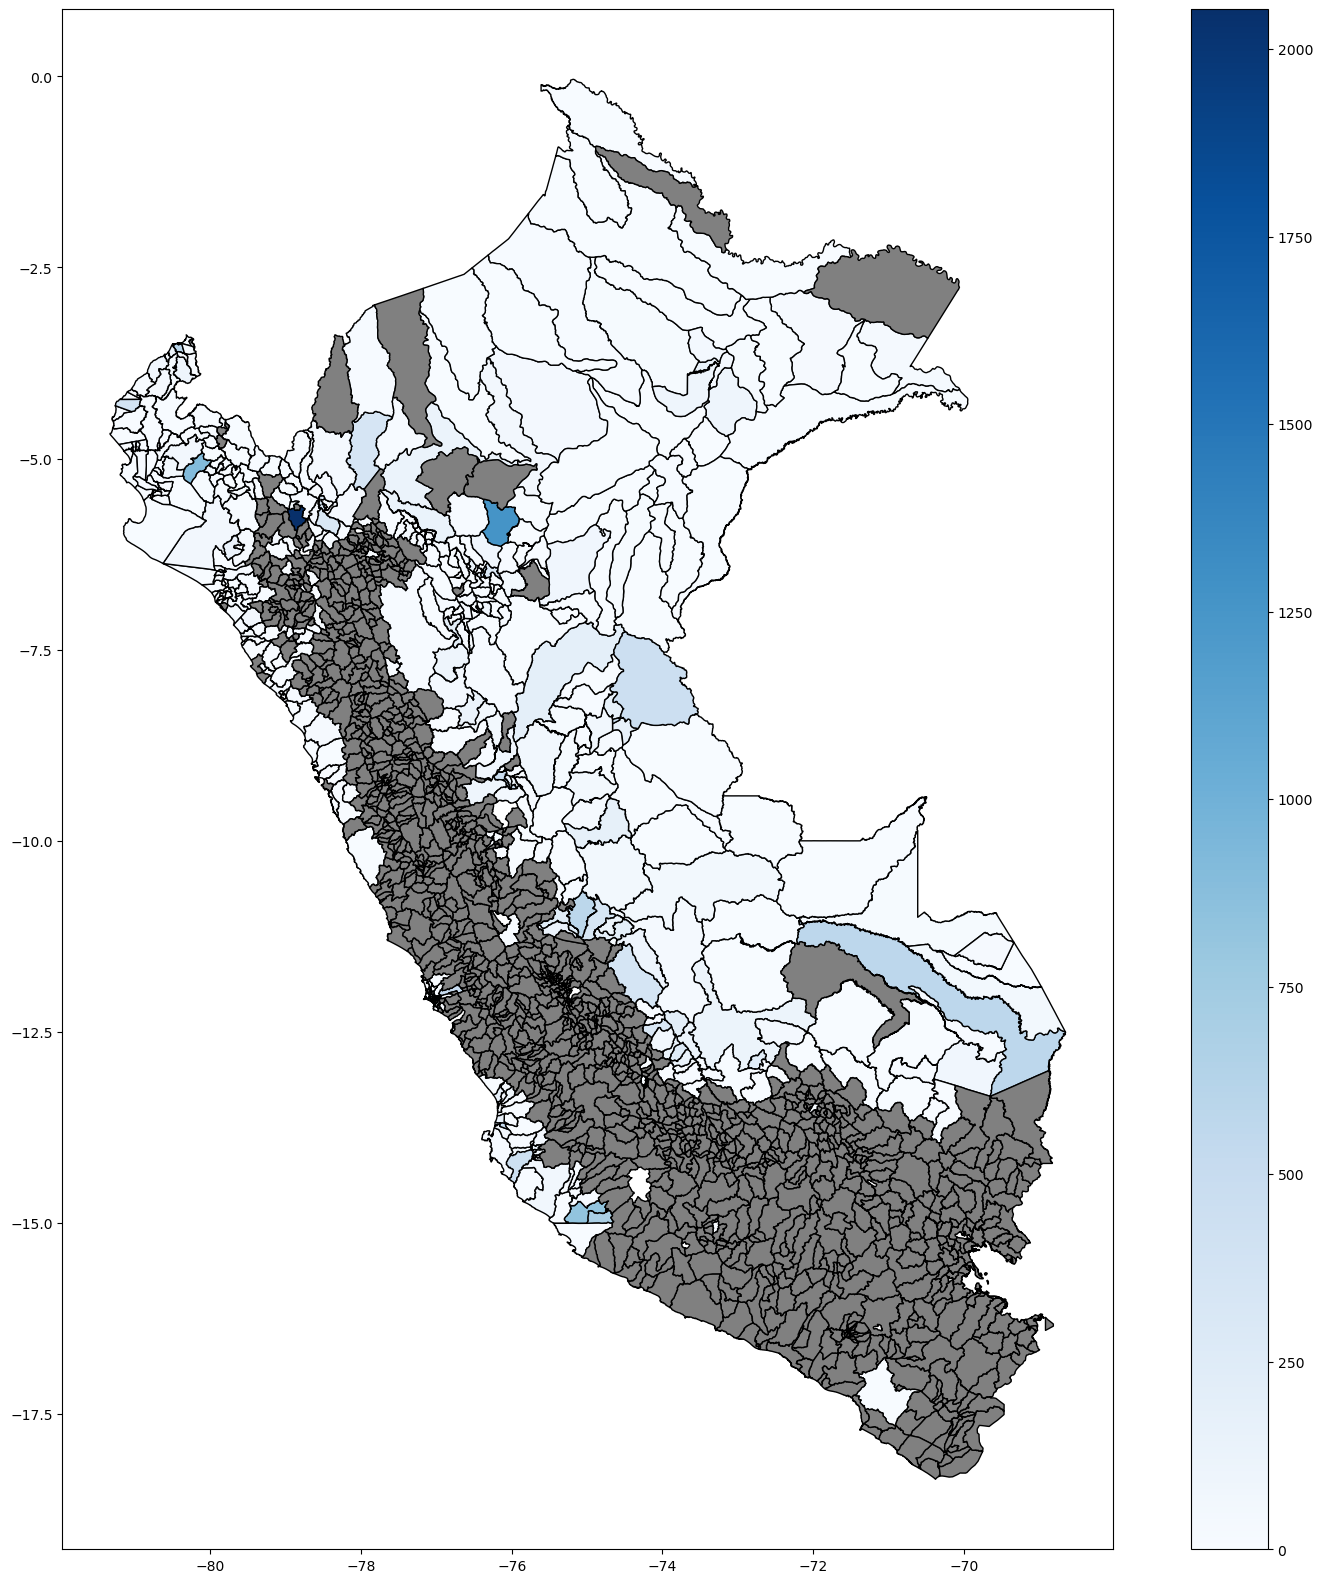

In [ ]:
#Plot this first graph in order to use the argument 'cmap'. We plot the DataFrame with NaN values. We use a continuous legend.
fig, ax = plt.subplots(figsize=(20, 20))

cmap = plt.cm.get_cmap('Blues')

cmap.set_bad(color='black')

dataset_2021.plot(column='Casos', cmap=cmap,
                   ax=ax, edgecolor='black',
                   legend=True, missing_kwds={'color': 'grey'})

In [ ]:
# Inverting colour map
cmap = plt.cm.OrRd

C:\Users\DELL\AppData\Local\Temp\ipykernel_1084\1653033055.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad(color='black')


<AxesSubplot:>

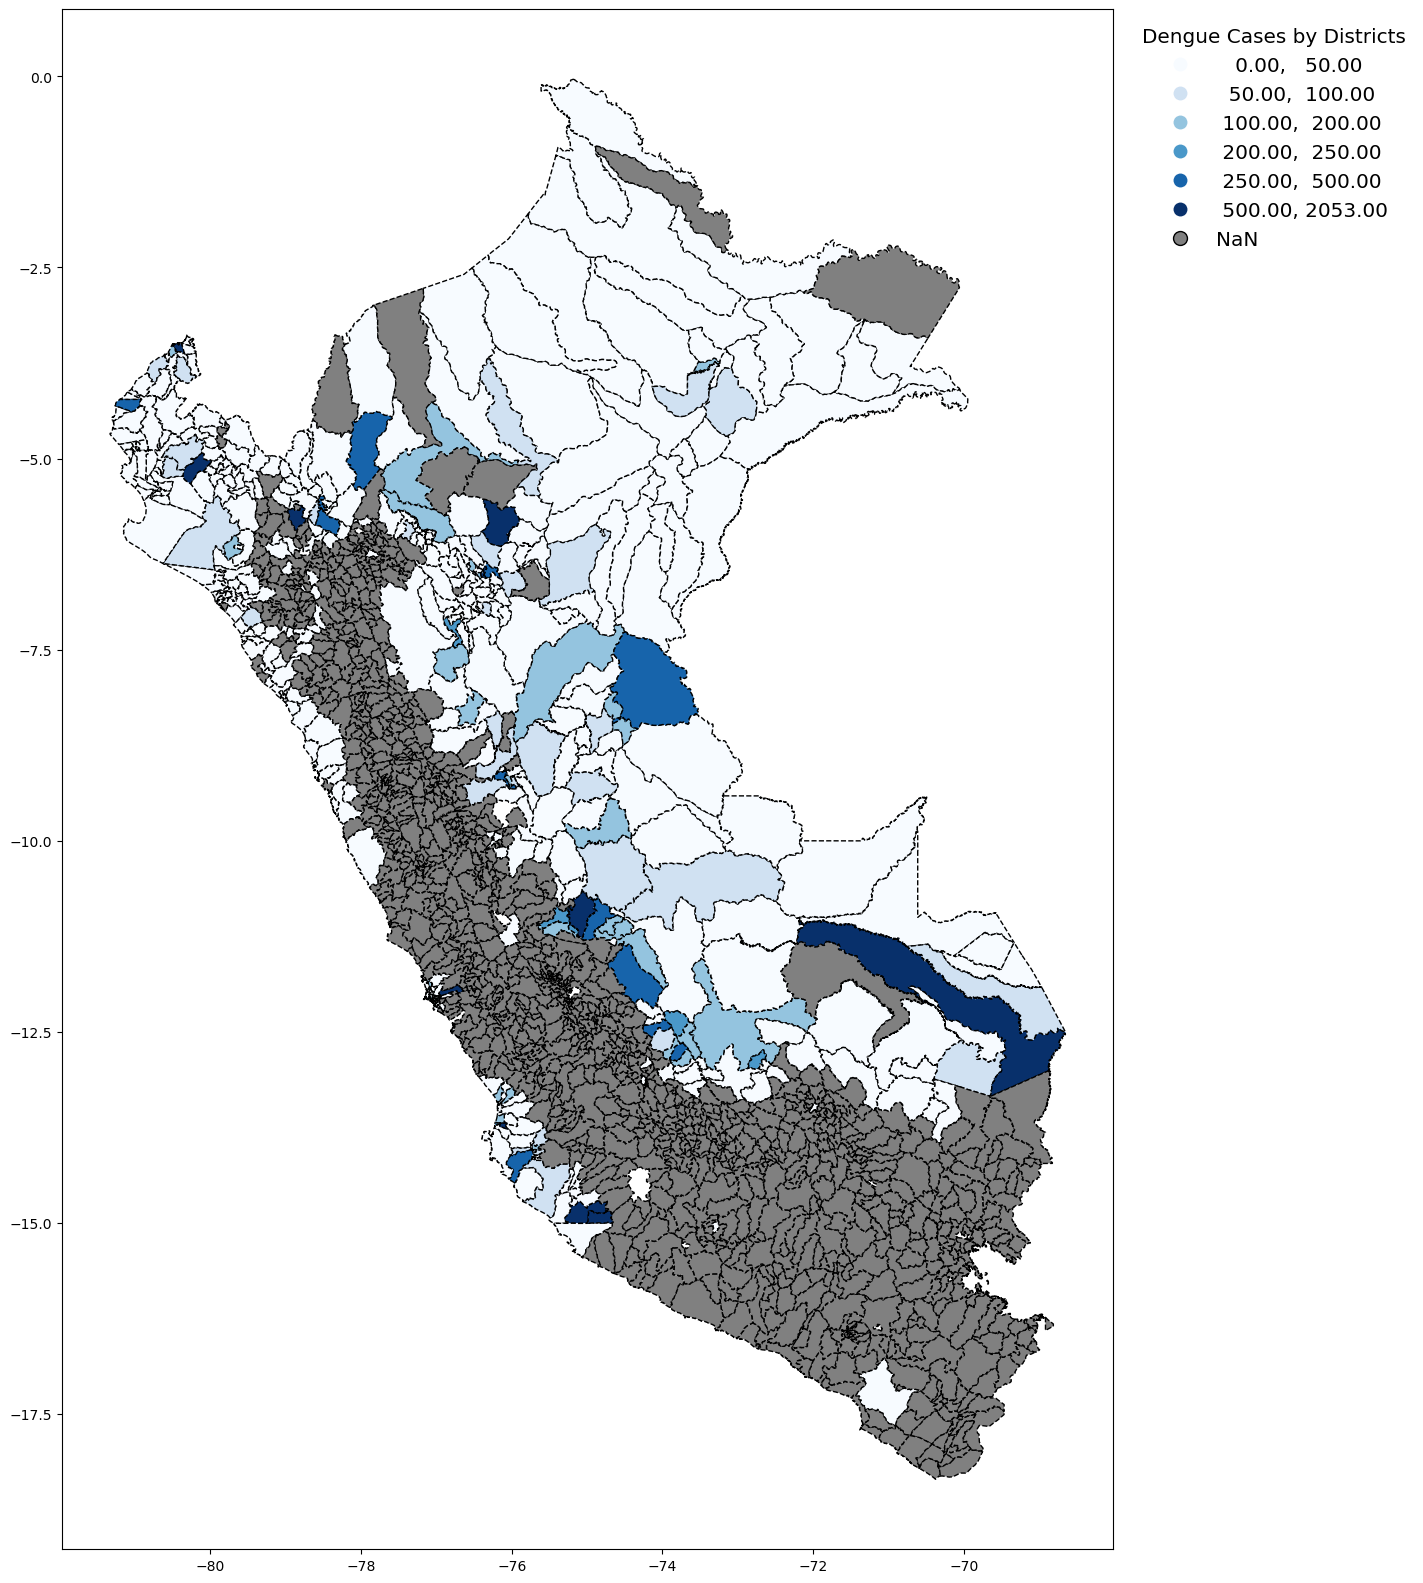

In [ ]:
#Final graph for this 3rd question. We use a discrete legend.
fig, ax = plt.subplots(figsize=(20, 20))

cmap = plt.cm.get_cmap('Blues')

cmap.set_bad(color='black')

dataset_2021.plot( ax = ax, 
        column='Casos', 
         cmap= cmap, 
        figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 50, 100, 200, 250,  500 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Dengue Cases by Districts", 
                            title_fontsize = 'x-large', 
                            frameon= False ),
         missing_kwds={'color': 'grey'}
        )

# Use geopandas to plot the number of cases in 2021by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. 

In [ ]:
maps #is a district level

,Ubigeo,geometry
0,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,40404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,40405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,40406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,40407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [ ]:
#We have to aggrergate the shapefile ar the province level
maps['UBIGEO_PRO'] = maps['Ubigeo'].astype(str).str[0:4]
maps

,Ubigeo,geometry,UBIGEO_DEP,UBIGEO_PRO
0,60504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",60,6050
1,61105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",61,6110
2,61109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",61,6110
3,61110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",61,6111
4,61203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",61,6120
...,...,...,...,...
1869,40404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",40,4040
1870,40405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",40,4040
1871,40406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",40,4040
1872,40407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",40,4040


In [ ]:
maps['UBIGEO_PRO'].unique().size

243

In [ ]:
prov_shp = maps.dissolve( by = 'UBIGEO_PRO' )
prov_shp

,geometry,Ubigeo,UBIGEO_DEP
UBIGEO_PRO,,,
1001,"POLYGON ((-76.37359 -10.15058, -76.37443 -10.1...",100113,10
1002,"POLYGON ((-76.05314 -10.22353, -76.05207 -10.2...",100207,10
1003,"POLYGON ((-76.74253 -9.86358, -76.74214 -9.864...",100311,10
1004,"POLYGON ((-76.65581 -8.98494, -76.65611 -8.985...",100401,10
1005,"POLYGON ((-76.55219 -9.54020, -76.55249 -9.540...",100510,10
...,...,...,...
9060,"MULTIPOLYGON (((-74.90908 -14.03472, -74.90960...",90606,90
9061,"MULTIPOLYGON (((-75.01717 -14.01080, -75.01687...",90612,90
9070,"MULTIPOLYGON (((-74.82643 -12.42699, -74.82643...",90703,90


In [ ]:
multipolygons = prov_shp[prov_shp.geom_type == 'MultiPolygon']
multipolygons.size

192

In [ ]:
multipolygons

,geometry,Ubigeo,UBIGEO_DEP
UBIGEO_PRO,,,
1010,"MULTIPOLYGON (((-76.56802 -10.09591, -76.56795...",10106,10
1011,"MULTIPOLYGON (((-76.52217 -9.91368, -76.52240 ...",101102,10
1012,"MULTIPOLYGON (((-77.75247 -6.24576, -77.75187 ...",10120,10
1031,"MULTIPOLYGON (((-77.90440 -6.02611, -77.90265 ...",10311,10
1050,"MULTIPOLYGON (((-77.99757 -6.51978, -77.99681 ...",10503,10
...,...,...,...
9060,"MULTIPOLYGON (((-74.90908 -14.03472, -74.90960...",90606,90
9061,"MULTIPOLYGON (((-75.01717 -14.01080, -75.01687...",90612,90
9070,"MULTIPOLYGON (((-74.82643 -12.42699, -74.82643...",90703,90


In [ ]:
#prov_shp.geometry[196]

In [ ]:
# fig, ax = plt.subplots( figsize = ( 12, 15 ) )
# prov_shp.plot( ax = ax )

In [ ]:
#Group by the previous dataframe
data_3 = data_2
#Create a special UBIGEO for Departments
data_3['UBIGEO_DEP'] = data_3['Ubigeo'].astype(str).str[0:2]
#Create a special UBIGEO for Provinces
data_3['UBIGEO_PRO'] = data_3['Ubigeo'].astype(str).str[0:4]
data_3

,Año,Departamento,Provincia,Distrito,Ubigeo,Casos,UBIGEO_DEP,UBIGEO_PRO
0,2015,AMAZONAS,BAGUA,ARAMANGO,10202,0.0,10,1020
1,2015,AMAZONAS,BAGUA,BAGUA,10201,7.0,10,1020
2,2015,AMAZONAS,BAGUA,COPALLIN,10203,0.0,10,1020
3,2015,AMAZONAS,BAGUA,EL PARCO,10204,0.0,10,1020
4,2015,AMAZONAS,BAGUA,IMAZA,10205,1.0,10,1020
...,...,...,...,...,...,...,...,...
3243,2021,UCAYALI,PADRE ABAD,CURIMANA,250303,22.0,25,2503
3244,2021,UCAYALI,PADRE ABAD,IRAZOLA,250302,19.0,25,2503
3245,2021,UCAYALI,PADRE ABAD,NESHUYA,250304,11.0,25,2503
3246,2021,UCAYALI,PADRE ABAD,PADRE ABAD,250301,68.0,25,2503


In [ ]:
dataset_3 = data_3.groupby( ['Año', 'UBIGEO_DEP','UBIGEO_PRO'], as_index = False )[['Casos']].sum()
dataset_3

,Año,UBIGEO_DEP,UBIGEO_PRO,Casos
0,2015,10,1001,7.0
1,2015,10,1002,1.0
2,2015,10,1005,0.0
3,2015,10,1006,177.0
4,2015,10,1007,0.0
...,...,...,...,...
667,2021,80,8040,0.0
668,2021,80,8090,504.0
669,2021,80,8091,249.0
670,2021,81,8110,2.0


In [ ]:
dataset = dataset_3.merge(multipolygons, on="UBIGEO_PRO", how="outer", indicator= True)
dataset

,Año,UBIGEO_DEP_x,UBIGEO_PRO,Casos,geometry,Ubigeo,UBIGEO_DEP_y,_merge
0,2015.0,10,1001,7.0,None,NaN,NaN,left_only
1,2016.0,10,1001,17.0,None,NaN,NaN,left_only
2,2017.0,10,1001,0.0,None,NaN,NaN,left_only
3,2018.0,10,1001,0.0,None,NaN,NaN,left_only
4,2019.0,10,1001,1.0,None,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...
719,NaN,NaN,9060,NaN,"MULTIPOLYGON (((-74.90908 -14.03472, -74.90960...",90606.0,90,right_only
720,NaN,NaN,9061,NaN,"MULTIPOLYGON (((-75.01717 -14.01080, -75.01687...",90612.0,90,right_only
721,NaN,NaN,9070,NaN,"MULTIPOLYGON (((-74.82643 -12.42699, -74.82643...",90703.0,90,right_only
722,NaN,NaN,9071,NaN,"MULTIPOLYGON (((-74.81314 -12.41721, -74.81266...",90710.0,90,right_only


In [ ]:
dataset_2021_prov = subdata( 2021 , "All-Peru")
dataset_2021_prov

,Año,UBIGEO_DEP_x,UBIGEO_PRO,Casos,geometry,Ubigeo,UBIGEO_DEP_y,_merge
6,2021.0,10,1001,9.0,None,NaN,NaN,left_only
13,2021.0,10,1002,1.0,None,NaN,NaN,left_only
20,2021.0,10,1005,98.0,None,NaN,NaN,left_only
27,2021.0,10,1006,882.0,None,NaN,NaN,left_only
34,2021.0,10,1007,16.0,None,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...
719,NaN,NaN,9060,NaN,"MULTIPOLYGON (((-74.90908 -14.03472, -74.90960...",90606.0,90,right_only
720,NaN,NaN,9061,NaN,"MULTIPOLYGON (((-75.01717 -14.01080, -75.01687...",90612.0,90,right_only
721,NaN,NaN,9070,NaN,"MULTIPOLYGON (((-74.82643 -12.42699, -74.82643...",90703.0,90,right_only
722,NaN,NaN,9071,NaN,"MULTIPOLYGON (((-74.81314 -12.41721, -74.81266...",90710.0,90,right_only


In [ ]:
dataset_2021_prov.dtypes

Año              float64
UBIGEO_DEP_x      object
UBIGEO_PRO        object
Casos            float64
geometry        geometry
Ubigeo           float64
UBIGEO_DEP_y      object
_merge          category
dtype: object

C:\Users\DELL\AppData\Local\Temp\ipykernel_1084\2534968291.py:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad(color='black')


AttributeError: 'Line2D' object has no property 'edgecolor'

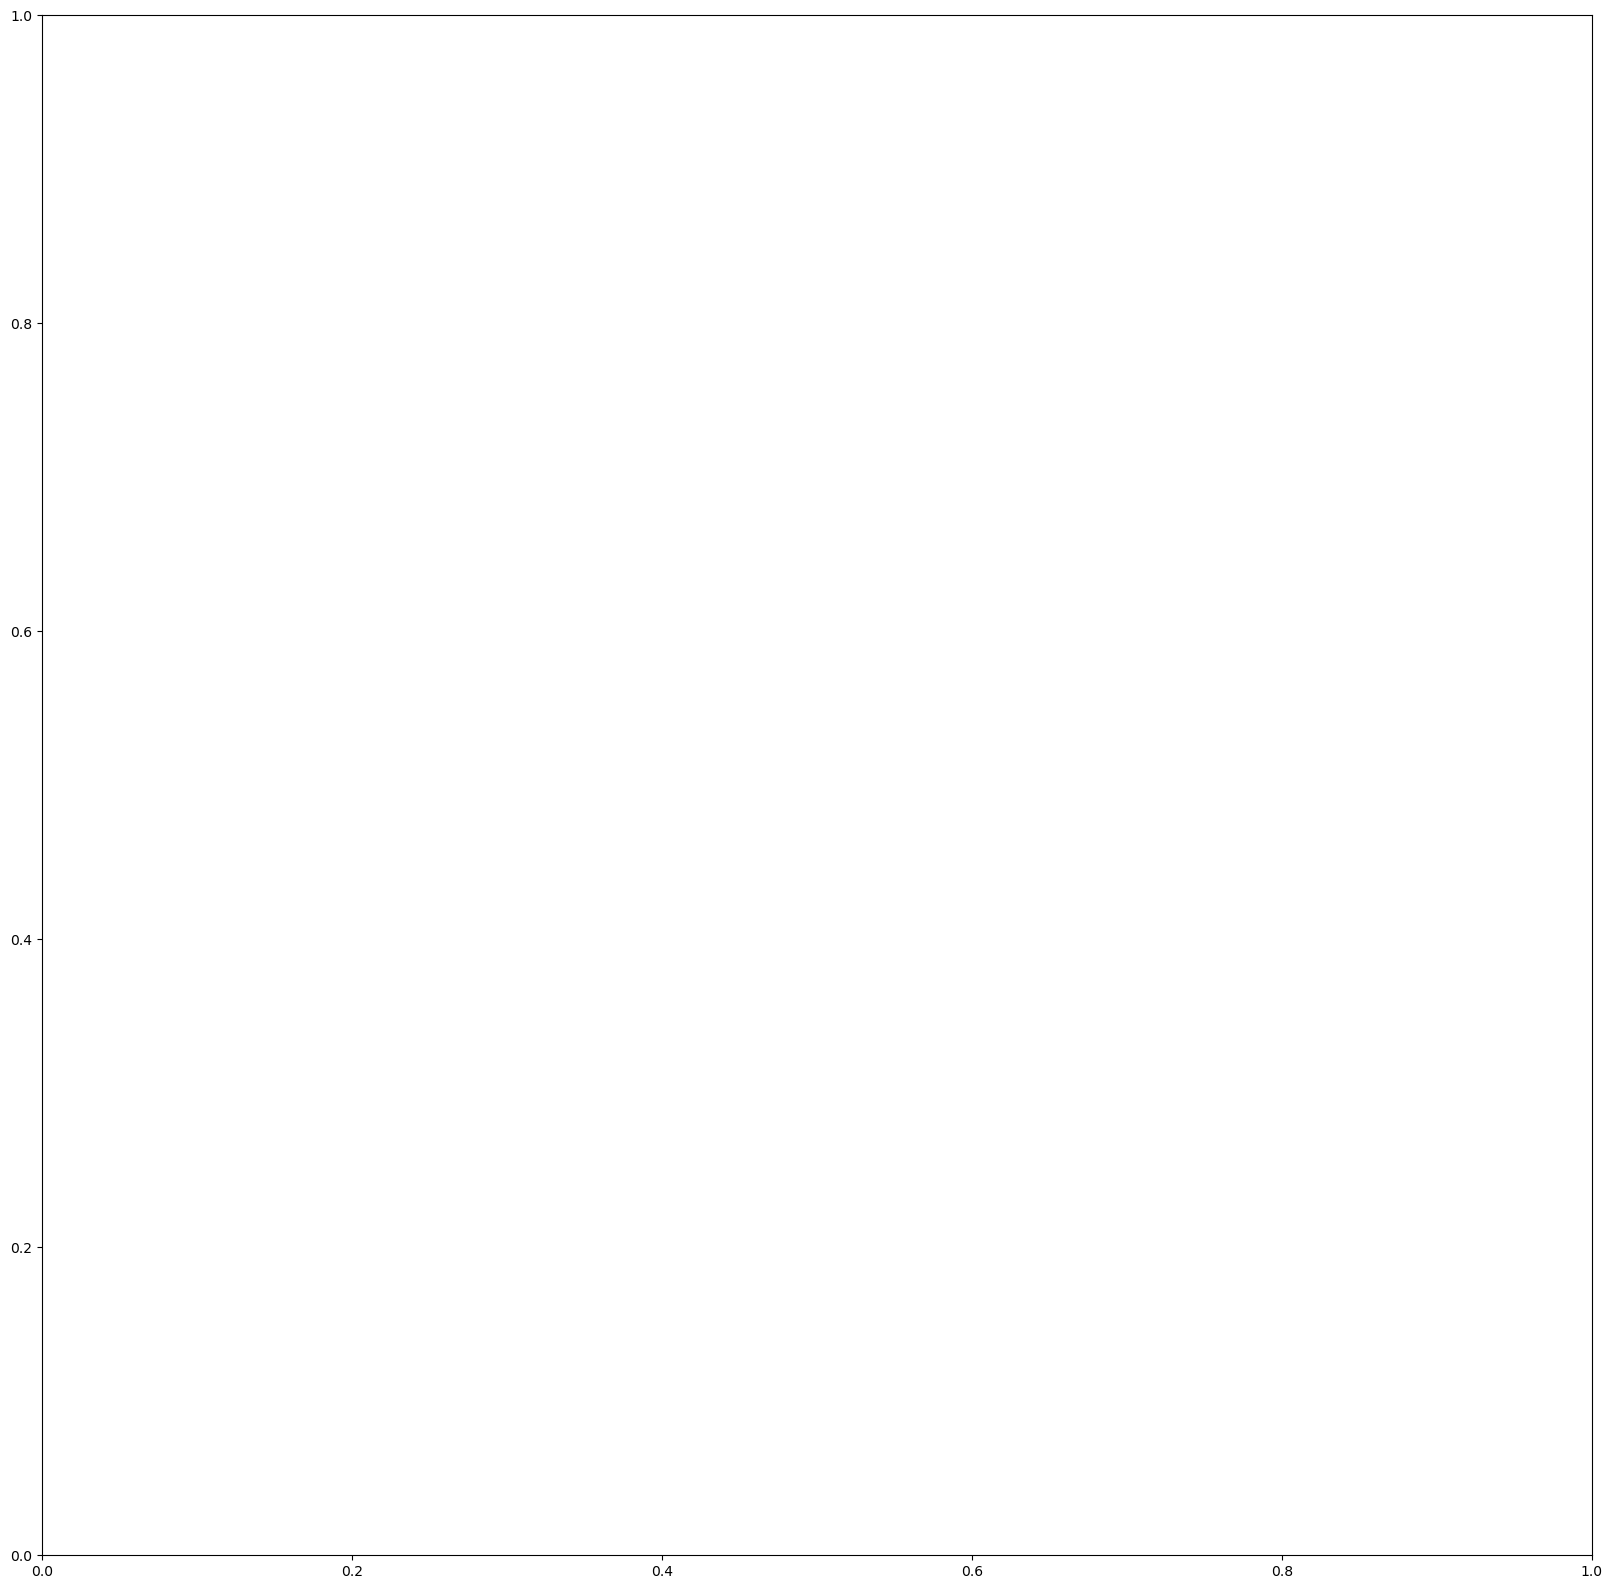

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

cmap = plt.cm.get_cmap('Blues')
cmap.set_bad(color='black')

pc = dataset_2021_prov.plot(column='Casos', cmap=cmap, ax=ax, edgecolor='none',
                            legend=True, missing_kwds={'color': 'grey'})
pc.set_edgecolor('black')

5.- Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.



In [1]:
from google.colab import files
uploaded = files.upload()

Saving INEI_LIMITE_DEPARTAMENTAL.cpg to INEI_LIMITE_DEPARTAMENTAL.cpg
Saving INEI_LIMITE_DEPARTAMENTAL.dbf to INEI_LIMITE_DEPARTAMENTAL.dbf
Saving INEI_LIMITE_DEPARTAMENTAL.prj to INEI_LIMITE_DEPARTAMENTAL.prj
Saving INEI_LIMITE_DEPARTAMENTAL.sbn to INEI_LIMITE_DEPARTAMENTAL.sbn
Saving INEI_LIMITE_DEPARTAMENTAL.sbx to INEI_LIMITE_DEPARTAMENTAL.sbx
Saving INEI_LIMITE_DEPARTAMENTAL.shp to INEI_LIMITE_DEPARTAMENTAL.shp
Saving INEI_LIMITE_DEPARTAMENTAL.shx to INEI_LIMITE_DEPARTAMENTAL.shx
Saving INEI_LIMITE_DEPARTAMENTAL.xml to INEI_LIMITE_DEPARTAMENTAL.xml


In [7]:
path_shp2 = "INEI_LIMITE_DEPARTAMENTAL.shp"
departments_shp = gpd.read_file(path_shp2)

In [8]:
departments_shp.head(2)

,OBJECTID_1,OBJECTID,CCDD,NOMBDEP,CAPITAL,Shape_STAr,Shape_STLe,ORIG_FID,Shape_Leng,Shape_Area,CORREO,CONTACTO,WHATSAPP,geometry
0,1,1.0,01,AMAZONAS,CHACHAPOYAS,3.203006,12.912088,0,12.912088,3.203006,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.81399 -2.99278, -77.81483 -2.995..."
1,2,2.0,02,ANCASH,HUARAZ,2.954592,11.780424,1,11.780424,2.954592,juan.suyo@geogpsperu.com,www.geogpsperu.com,931381206,"POLYGON ((-77.64697 -8.05086, -77.64689 -8.051..."


In [19]:
# Aggregate the data by department and year
agg_data = data.groupby(["Año", "Departamento"])["Casos"].sum().reset_index()

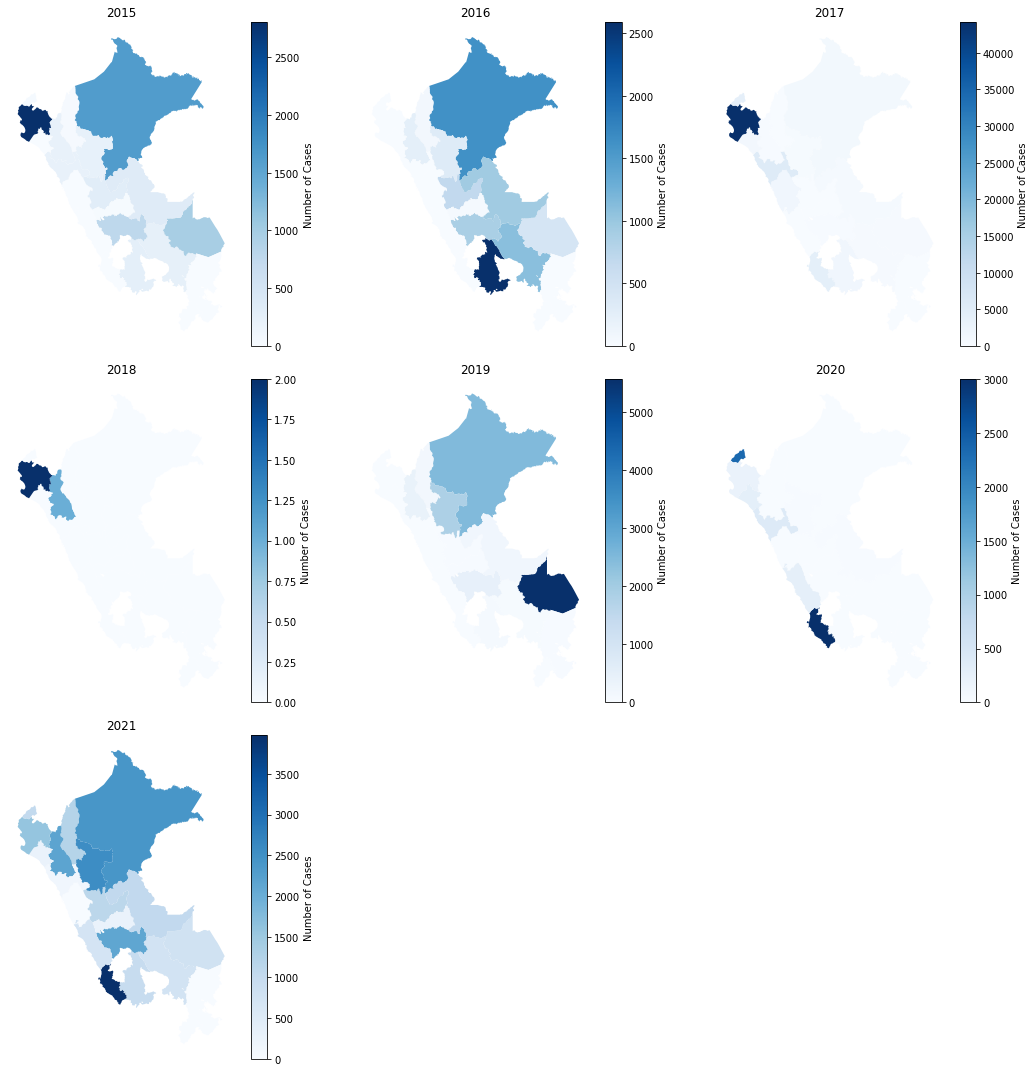

In [20]:
#Loop over years
years = sorted(data.Año.unique())
ncols = 3
nrows = (len(years)+ncols-1)//ncols

#creating subplots

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))

# Loop over years
for i, year in enumerate(years):
    # Filter data for year
    year_data = agg_data[agg_data['Año'] == year]
    
    # Merge with shapefile
    merged = departments_shp.merge(year_data, left_on='NOMBDEP', right_on='Departamento')
    
    
    # Plot
    ax = axs[i // ncols, i % ncols]
    
    merged.plot(column='Casos', cmap='Blues', ax=ax, legend=True, legend_kwds={'label': 'Number of Cases'})
    ax.set_title(year)
    ax.axis('off')

    # add color for NA values
    ax.set_facecolor('red')

    

for j in range(i+1, nrows*ncols):
    axs[j // ncols, j % ncols].set_visible(False)
    
plt.tight_layout()
plt.show()

## 6. Subplot cases by department 2021
Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.

In [ ]:
maps2 = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
maps2 = maps2[ [ 'Departamento', 'geometry' ] ]
maps2 = maps2.dissolve( by = 'NOMBDEP', aggfunc='sum' ).reset_index()

ImportError: The 'read_file' function requires the 'pyogrio' or 'fiona' package, but neither is installed or imports correctly.
Importing fiona resulted in: cannot import name compat
Importing pyogrio resulted in: No module named 'pyogrio'

In [ ]:
data_2021 = data[ data[ "Año" ] == 2021 ]
data_2021

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,NaN
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


In [ ]:
type(data_2021["Semana"])

pandas.core.series.Series

In [ ]:
#There are 52 weeks in a year. Each quarter is 13 weeks longs
# if data_2021["Semana"] > 13:
#     data_2021["Quarter"] == "Q1"
# elif data_2021["Se,ama"] > 26:
#     data_2021["Quarter"] == "Q2"
# elif data_2021["Se,ama"] > 39:
#     data_2021["Quarter"] == "Q3"
# else: 
#     data_2021["Quarter"] == "Q4"

In [ ]:
#There are 52 weeks in a year. Each quarter is 13 weeks longs
data_2021["Quarter"] = np.where(data_2021["Semana"]<14, "Q1",
                   np.where(data_2021["Semana"]<27, "Q2",
                   np.where(data_2021["Semana"]<40, "Q3", "Q4")))
data_2021

/var/folders/79/q_j4g_550cd5m0w3kcvjwhjw0000gn/T/ipykernel_5026/3981044494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021["Quarter"] = np.where(data_2021["Semana"]<14, "Q1",


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Quarter
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,Q4
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,Q4
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN,Q4
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,Q4
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,NaN,Q4
...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,Q4
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,Q4
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,Q4
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,Q4


In [ ]:
data_2021 = data_2021[ [ "Departamento", "Casos", "Quarter" ] ]
data_2021_G = data_2021.groupby( [ "Departamento", "Quarter" ] ).sum().reset_index()
data_2021_G

,Departamento,Quarter,Casos
0,AMAZONAS,Q1,599.0
1,AMAZONAS,Q2,387.0
2,AMAZONAS,Q3,218.0
3,AMAZONAS,Q4,0.0
4,ANCASH,Q1,0.0
...,...,...,...
79,TUMBES,Q4,0.0
80,UCAYALI,Q1,877.0
81,UCAYALI,Q2,140.0
82,UCAYALI,Q3,26.0


In [ ]:
data_2021_G = data_2021_G.merge( maps2, how = 'outer', on = 'NOMBDEP' )

NameError: name 'maps2' is not defined

In [ ]:
#Subset to plot
Plot1 = data_2021_G[data_2021_G["Quarter"] == "Q1"]
Plot2 = data_2021_G[data_2021_G["Quarter"] == "Q2"]
Plot3 = data_2021_G[data_2021_G["Quarter"] == "Q3"]
Plot4 = data_2021_G[data_2021_G["Quarter"] == "Q4"]

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

cmap = plt.cm.get_cmap('Blues')

cmap.set_bad(color='black')

Plot1.plot( ax = ax, 
           column='Casos', 
           cmap= cmap, 
           figsize=(20, 20), 
           linestyle='--',
           edgecolor='black', 
           legend = True,  
           scheme = "User_Defined",
           classification_kwds = dict( bins = [ 400, 850, 1300, 1550, ] ),
           legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Dengue Cases by Departamento - Quarter 1", 
                            title_fontsize = 'x-large', 
                            frameon= False ),
           missing_kwds={'color': 'grey'}
          )

,Departamento,Quarter,Casos
0,AMAZONAS,Q1,599.0
4,ANCASH,Q1,0.0
8,AYACUCHO,Q1,641.0
12,CAJAMARCA,Q1,594.0
16,CALLAO,Q1,0.0
20,CUSCO,Q1,437.0
24,HUANUCO,Q1,635.0
28,ICA,Q1,2107.0
32,JUNIN,Q1,1135.0
36,LA LIBERTAD,Q1,88.0


/var/folders/79/q_j4g_550cd5m0w3kcvjwhjw0000gn/T/ipykernel_5026/1758267933.py:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad(color='black')


AttributeError: 'Line2D' object has no property 'edgecolor'

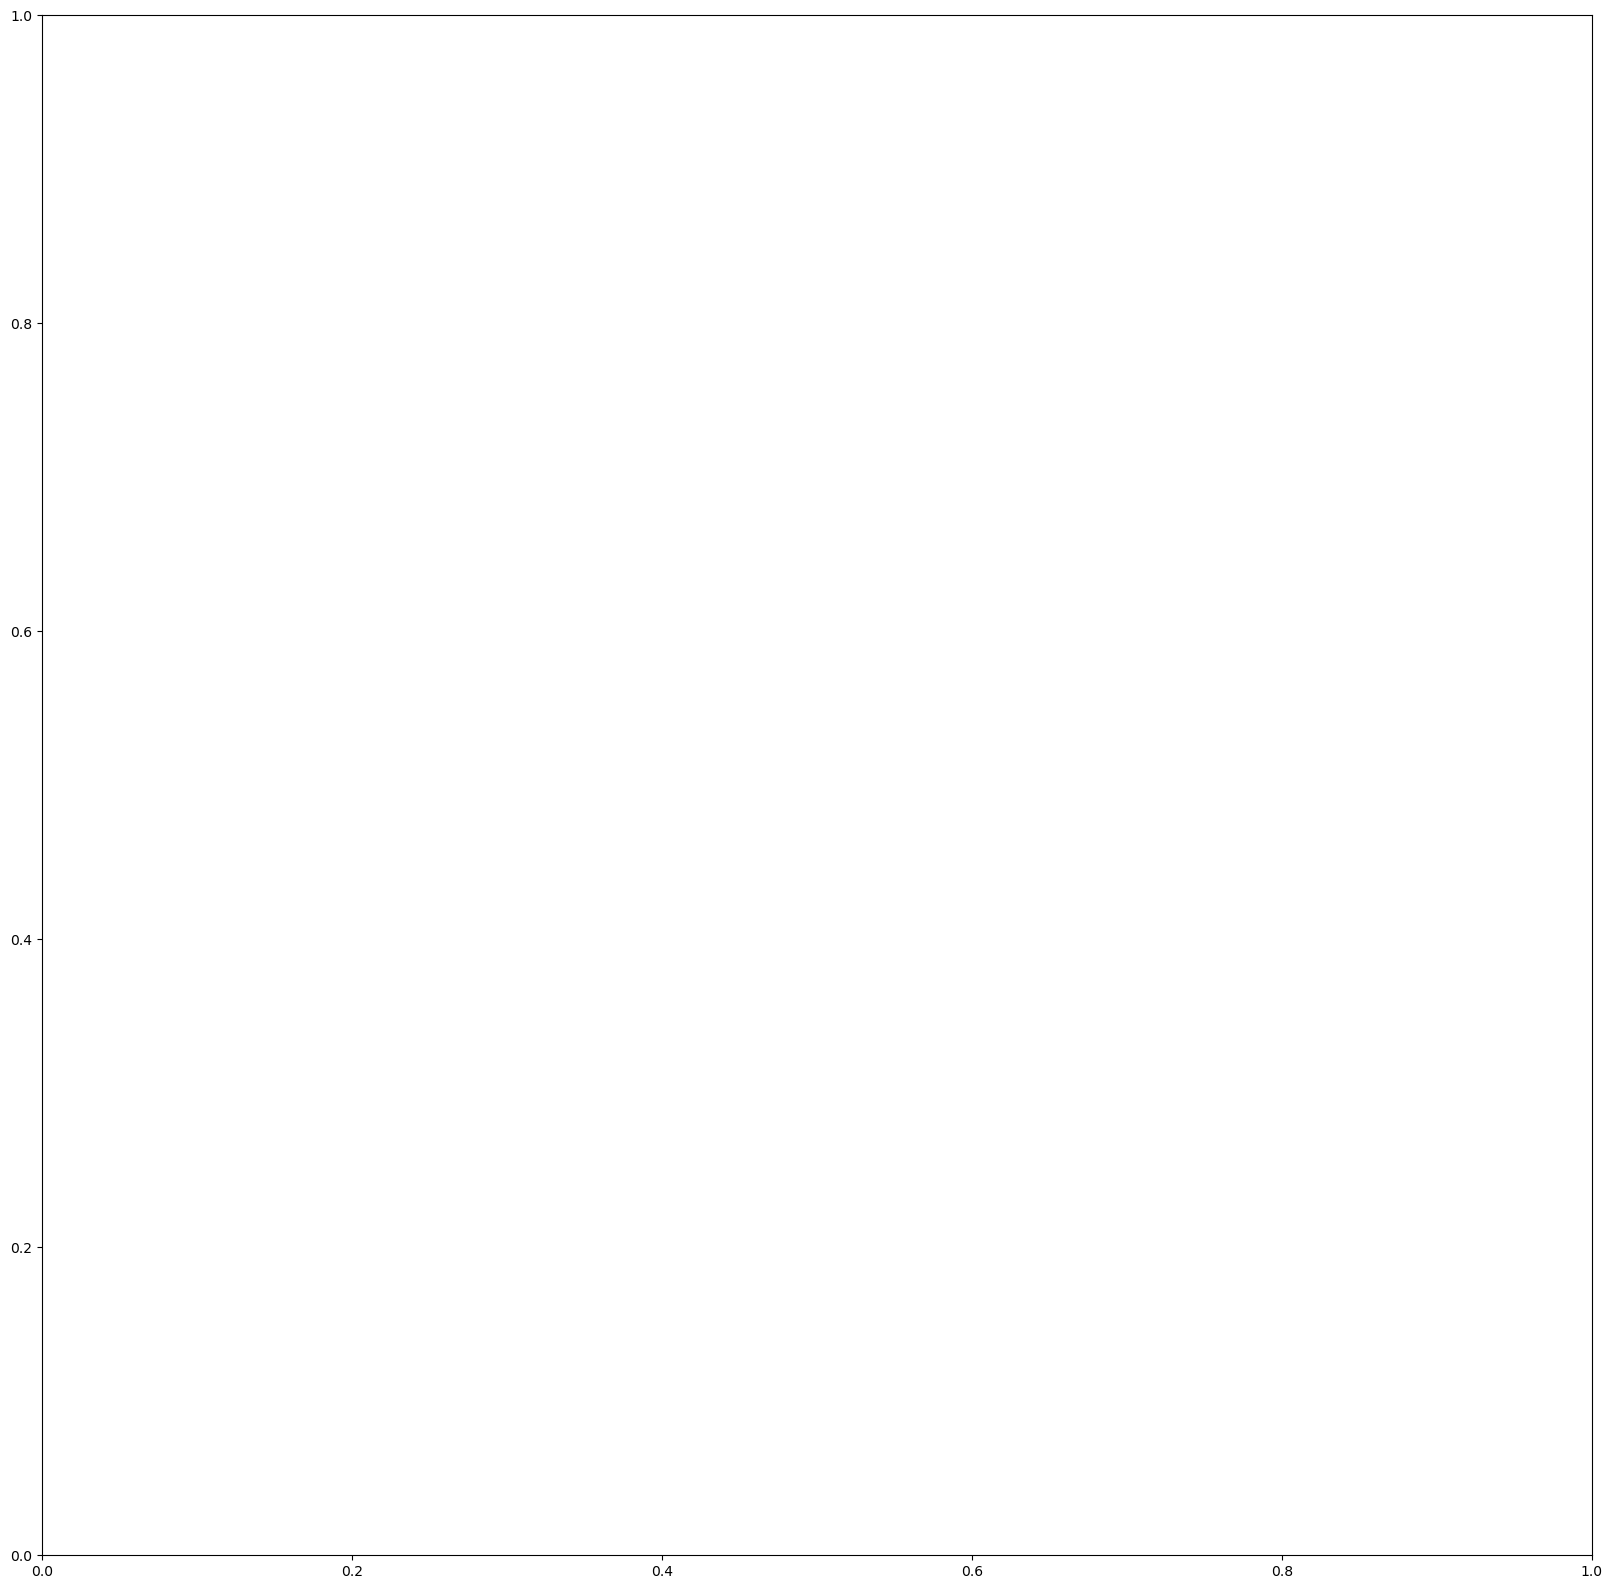

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

cmap = plt.cm.get_cmap('Blues')

cmap.set_bad(color='black')

Plot2.plot( ax = ax, 
           column='Casos', 
           cmap= cmap, 
           figsize=(20, 20), 
           linestyle='--',
           edgecolor='black', 
           legend = True,  
           scheme = "User_Defined",
           classification_kwds = dict( bins = [ 400, 850, 1300, 1550, ] ),
           legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Dengue Cases by Departamento - Quarter 2", 
                            title_fontsize = 'x-large', 
                            frameon= False ),
           missing_kwds={'color': 'grey'}
          )

/var/folders/79/q_j4g_550cd5m0w3kcvjwhjw0000gn/T/ipykernel_5026/3152643332.py:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad(color='black')


AttributeError: 'Line2D' object has no property 'edgecolor'

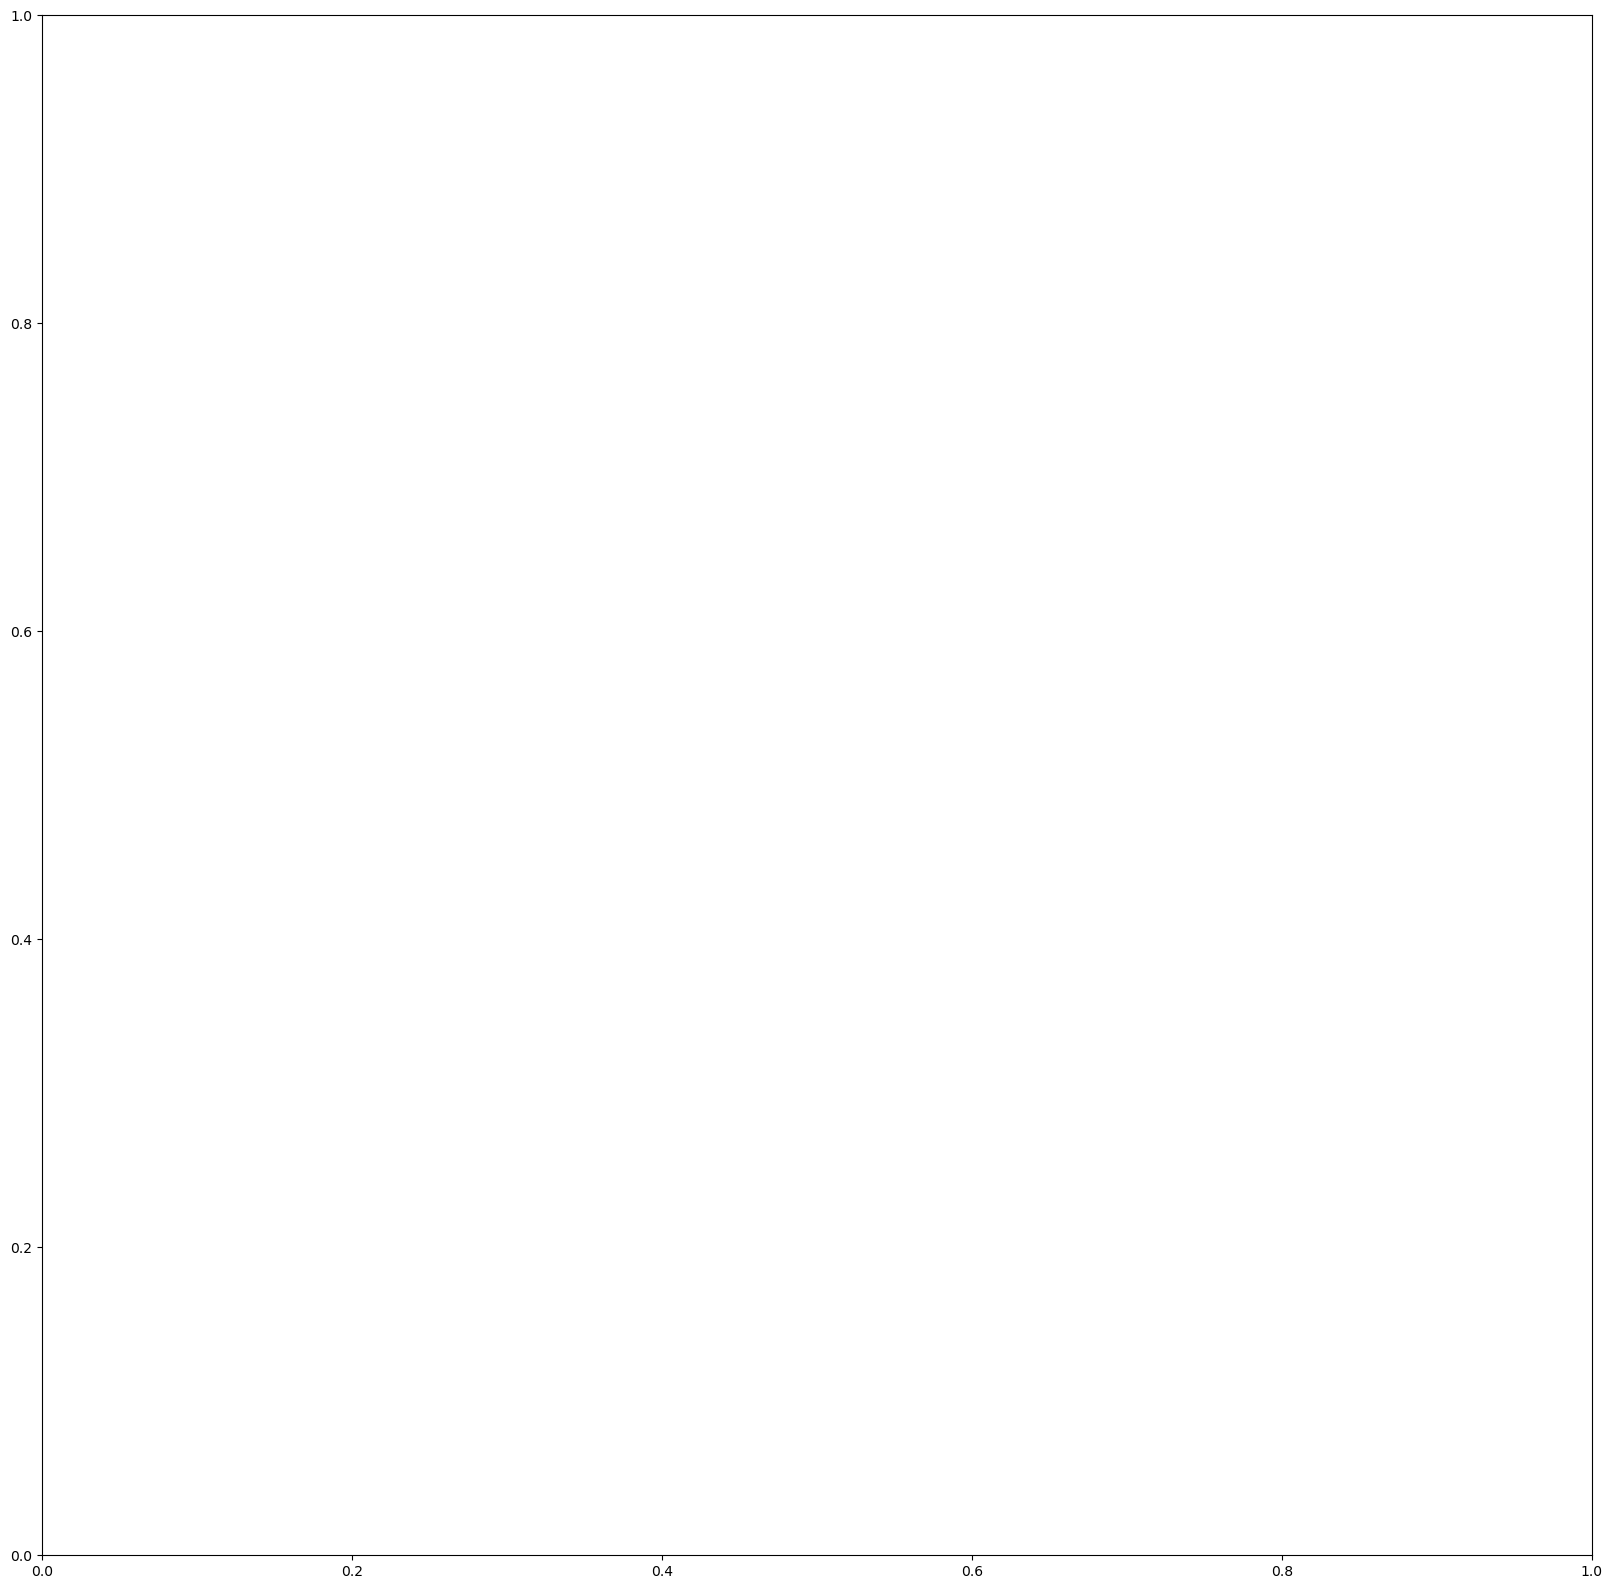

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

cmap = plt.cm.get_cmap('Blues')

cmap.set_bad(color='black')

Plot3.plot( ax = ax, 
           column='Casos', 
           cmap= cmap, 
           figsize=(20, 20), 
           linestyle='--',
           edgecolor='black', 
           legend = True,  
           scheme = "User_Defined",
           classification_kwds = dict( bins = [ 400, 850, 1300, 1550, ] ),
           legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Dengue Cases by Departamento - Quarter 3", 
                            title_fontsize = 'x-large', 
                            frameon= False ),
           missing_kwds={'color': 'grey'}
          )

/var/folders/79/q_j4g_550cd5m0w3kcvjwhjw0000gn/T/ipykernel_5026/1625871820.py:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Blues").copy()
  cmap.set_bad(color='black')


AttributeError: 'Line2D' object has no property 'edgecolor'

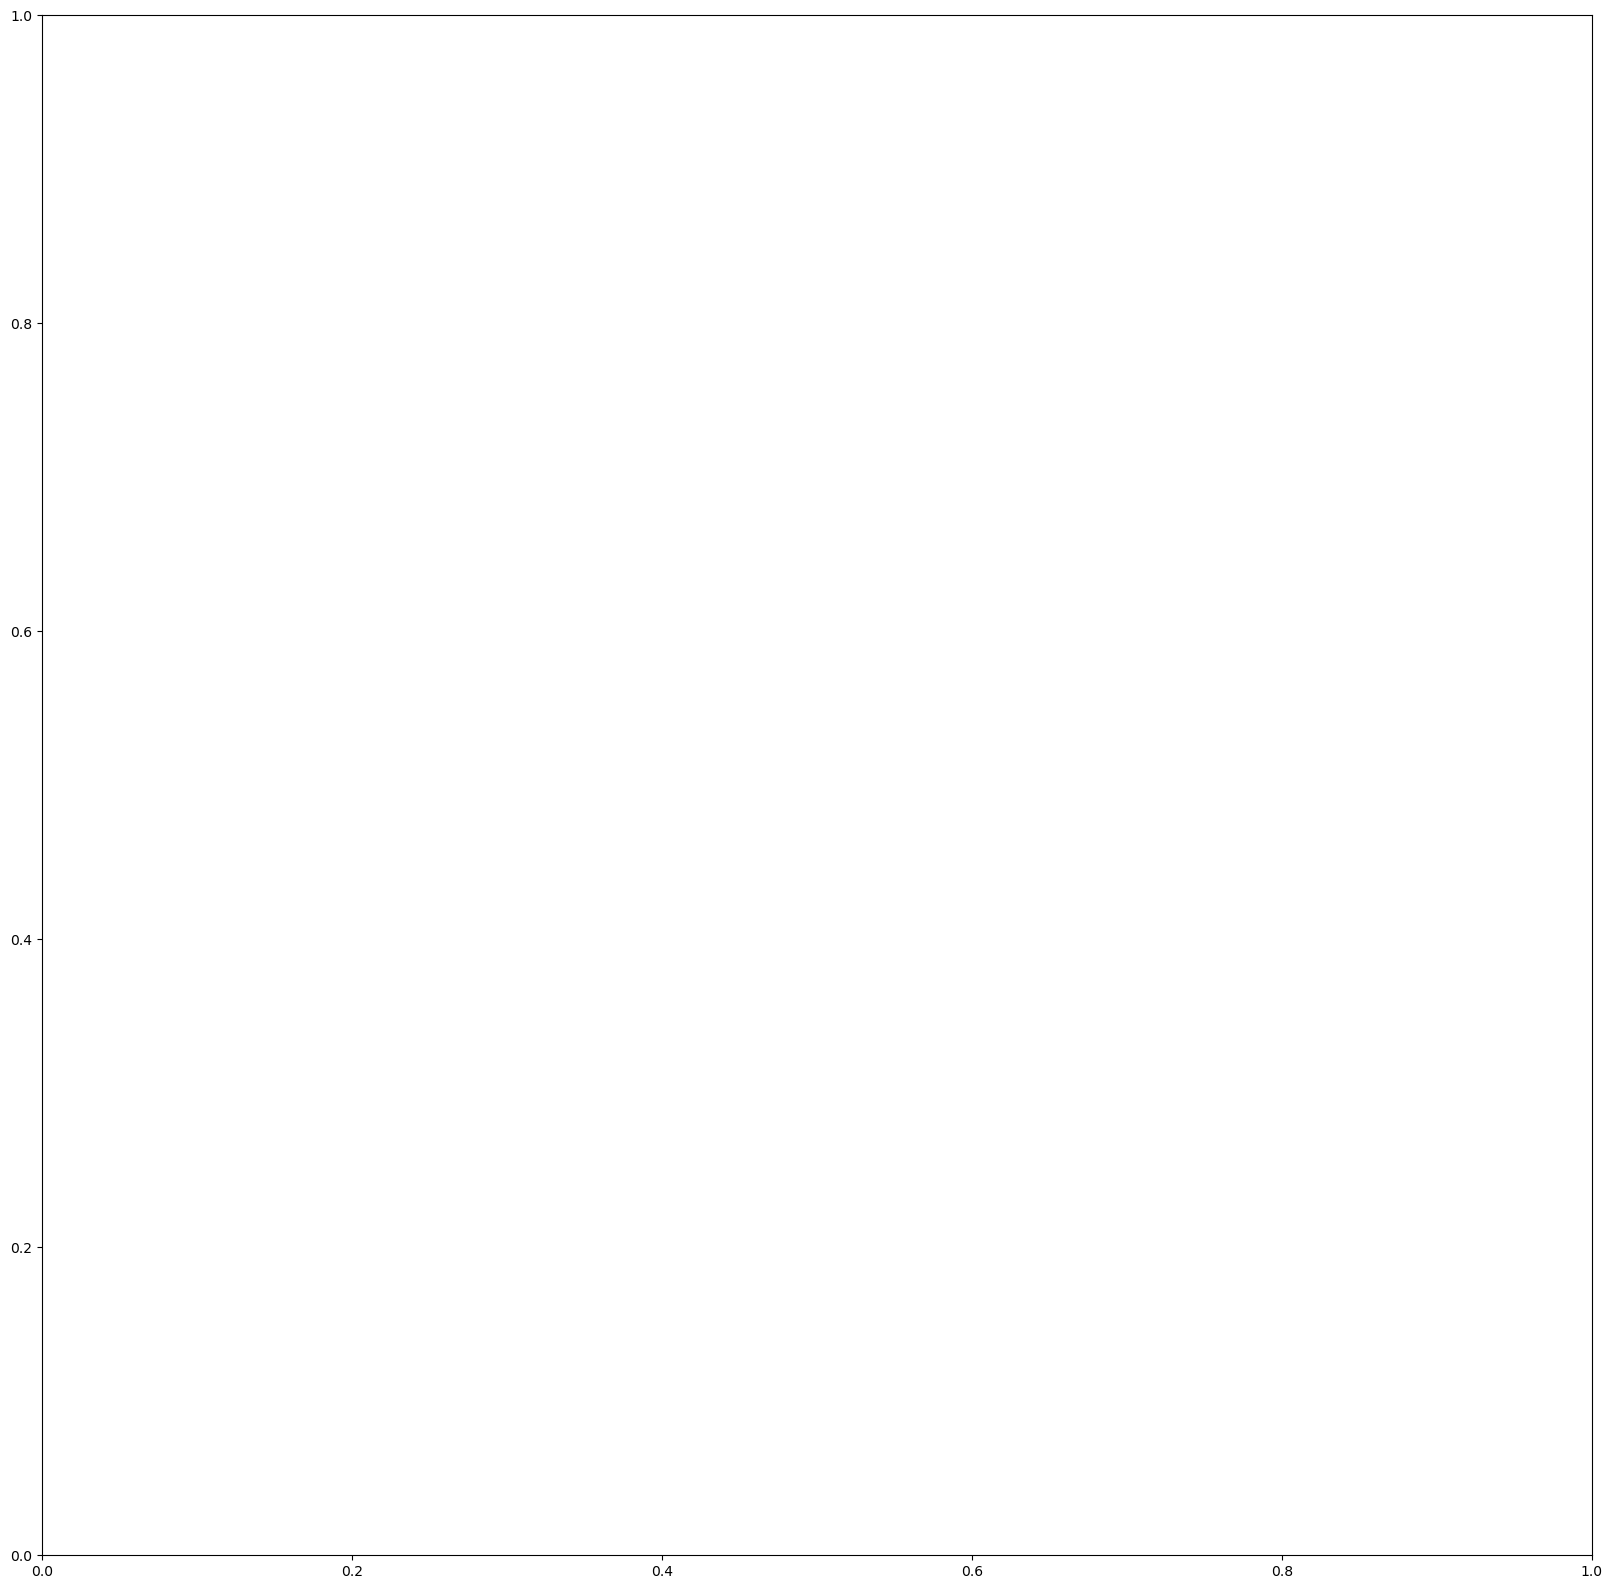

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

cmap = plt.cm.get_cmap('Blues')

cmap.set_bad(color='black')

Plot4.plot( ax = ax, 
           column='Casos', 
           cmap= cmap, 
           figsize=(20, 20), 
           linestyle='--',
           edgecolor='black', 
           legend = True,  
           scheme = "User_Defined",
           classification_kwds = dict( bins = [ 400, 850, 1300, 1550, ] ),
           legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Dengue Cases by Departamento - Quarter 4", 
                            title_fontsize = 'x-large', 
                            frameon= False ),
           missing_kwds={'color': 'grey'}
          )